<center><h1>Zhao_Yichen_HW8</h1></center>

Name: Yichen Zhao
<br>
Github Username: Iannnzyc
<br>
USC ID: 4488183532

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [55]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [3]:
f = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
features = []
for stat in ['mean', 'se', 'largest']:
    for i in f:
        features.append(f'{i}_{stat}')
        
cols = ['id', 'Diagnosis'] + features
df = pd.read_csv('../data/wdbc.data', names=cols)
df

,id,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave points_largest,symmetry_largest,fractal dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

In [4]:
df = df.drop('id', axis=1)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave points_largest,symmetry_largest,fractal dimension_largest
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### (i) Supervised Learning

In [5]:
def model_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    return accuracy,precision,f1,recall,auc

In [25]:
train_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
test_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

In [65]:
param_grid ={'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]} 
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    # Normalize data
    norm = Normalizer()
    norm.fit(X_train)
    X_train = norm.transform(X_train)
    X_test = norm.transform(X_test)
    
    # Model
    model = LinearSVC(penalty='l1', dual=False)
    gridCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    gridCV.fit(X_train, y_train)
    
    opt_model = LinearSVC(penalty='l1', dual=False, C=gridCV.best_params_['C'])
    opt_model.fit(X_train, y_train)
    
    # train_report
    accuracy,precision,f1,recall,auc = model_report(opt_model, X_train, y_train)
    train_report['accuracy'].append(accuracy)
    train_report['precision'].append(precision)
    train_report['f1'].append(f1)
    train_report['recall'].append(recall)
    train_report['auc'].append(auc)
    
    # test_report
    accuracy,precision,f1,recall,auc = model_report(opt_model, X_test, y_test)
    test_report['accuracy'].append(accuracy)
    test_report['precision'].append(precision)
    test_report['f1'].append(f1)
    test_report['recall'].append(recall)
    test_report['auc'].append(auc)

In [66]:
for stat in train_report.keys():
    print(f'The average {stat} of training set is {np.mean(train_report[stat])}')

for stat in test_report.keys():
    print(f'The average {stat} of test set is {np.mean(test_report[stat])}')

The average accuracy of training set is 0.9709271238452862
The average precision of training set is 0.9650917442860406
The average recall of training set is 0.9569456037448536
The average f1 of training set is 0.9609940890381576
The average auc of training set is 0.9681179992031027
The average accuracy of test set is 0.9642543859649123
The average precision of test set is 0.9502362678023991
The average recall of test set is 0.953061224489796
The average f1 of test set is 0.9515206196408339
The average auc of test set is 0.961922477324263


Confusion Matrix of training set
[[279   6]
 [  5 165]]


Text(0.5, 1.0, 'ROC')

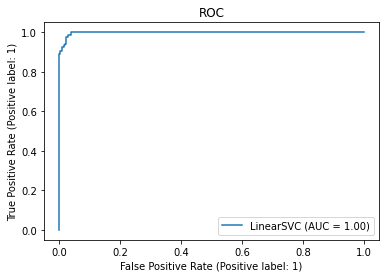

In [67]:
# confusion matrix and roc of training set for the last run
y_pred = opt_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(f'Confusion Matrix of training set')
print(cm)
RocCurveDisplay.from_estimator(opt_model, X_train, y_train) 
plt.title('ROC')

Confusion Matrix of test set
[[69  3]
 [ 5 37]]


Text(0.5, 1.0, 'ROC')

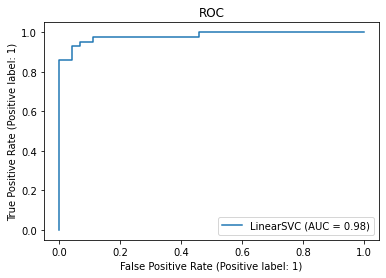

In [68]:
# confusion matrix and roc of test set for the last run
y_pred = opt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix of test set')
print(cm)
RocCurveDisplay.from_estimator(opt_model, X_test, y_test) 
plt.title('ROC')

#### (ii) Semi-Supervised Learning/ Self-training

In [69]:
train_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
test_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

In [98]:
param_grid ={'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]} 
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    # Normalize data
    norm = Normalizer()
    norm.fit(X_train)
    X_train = norm.transform(X_train)
    X_test = norm.transform(X_test)
    
    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)
    
    # Model
    model = LinearSVC(penalty='l1', dual=False)
    gridCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    gridCV.fit(X_labeled, y_labeled)
    
    while len(X_unlabeled) > 0:
        distances = [gridCV.decision_function(instance.reshape(1, -1)) for instance in X_unlabeled]
        max_distance_index = np.argmax(distances)
        label_predict = gridCV.predict(X_unlabeled[max_distance_index].reshape(1, -1))
        X_labeled = np.concatenate((X_labeled, X_unlabeled[max_distance_index].reshape(1, -1)))
        y_labeled = np.concatenate((y_labeled, label_predict))
        X_unlabeled = np.delete(X_unlabeled, max_distance_index, axis=0)
        gridCV.fit(X_labeled, y_labeled)
    
    opt_model = LinearSVC(penalty='l1', dual=False, C=gridCV.best_params_['C'])
    opt_model.fit(X_labeled, y_labeled)
    # train_report
    accuracy,precision,f1,recall,auc = model_report(opt_model, X_train, y_train)
    train_report['accuracy'].append(accuracy)
    train_report['precision'].append(precision)
    train_report['f1'].append(f1)
    train_report['recall'].append(recall)
    train_report['auc'].append(auc)
    
    # test_report
    accuracy,precision,f1,recall,auc = model_report(opt_model, X_test, y_test)
    test_report['accuracy'].append(accuracy)
    test_report['precision'].append(precision)
    test_report['f1'].append(f1)
    test_report['recall'].append(recall)
    test_report['auc'].append(auc)

In [99]:
for stat in train_report.keys():
    print(f'The average {stat} of training set is {np.mean(train_report[stat])}')

for stat in test_report.keys():
    print(f'The average {stat} of test set is {np.mean(test_report[stat])}')

The average accuracy of training set is 0.7582657779379091
The average precision of training set is 0.7589113323787445
The average recall of training set is 0.7096110575377693
The average f1 of training set is 0.7106186848279282
The average auc of training set is 0.7484494746992842
The average accuracy of test set is 0.7326998050682262
The average precision of test set is 0.7230873387103187
The average recall of test set is 0.7186507936507935
The average f1 of test set is 0.7086553686756709
The average auc of test set is 0.7297729276895943


Confusion Matrix of training set
[[273  12]
 [  7 163]]


Text(0.5, 1.0, 'ROC')

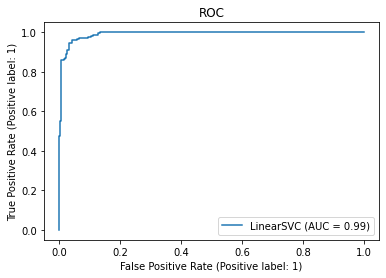

In [100]:
# confusion matrix and roc of training set for the last run
y_pred = opt_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(f'Confusion Matrix of training set')
print(cm)
RocCurveDisplay.from_estimator(opt_model, X_train, y_train) 
plt.title('ROC')

Confusion Matrix of test set
[[68  4]
 [ 2 40]]


Text(0.5, 1.0, 'ROC')

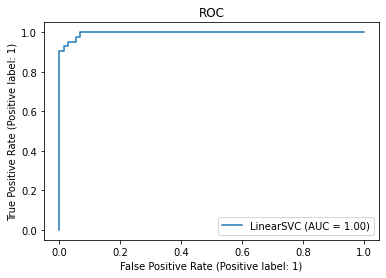

In [101]:
# confusion matrix and roc of test set for the last run
y_pred = opt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix of test set')
print(cm)
RocCurveDisplay.from_estimator(opt_model, X_test, y_test) 
plt.title('ROC')

#### (iii) Unsupervised Learning

In [6]:
def model_report_ii(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    return accuracy,precision,f1,recall,auc

In [38]:
train_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
test_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

In [61]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    # Normalize data
    norm = Normalizer()
    norm.fit(X_train)
    X_train = norm.transform(X_train)
    X_test = norm.transform(X_test)
    
    # Model
    model = KMeans(n_clusters=2, init='random')
    model.fit(X_train)
    
    centers = model.cluster_centers_
    
    knn = NearestNeighbors(n_neighbors=30)
    knn.fit(X_train)
    
    distances, indices = knn.kneighbors(model.cluster_centers_)
    neighbors_c1 = y_train.iloc[indices[0]]
    neighbors_c2 = y_train.iloc[indices[1]]
    majority_c1 = neighbors_c1.mode()[0]
    majority_c2 = neighbors_c2.mode()[0]
    
    labels_pred = model.labels_
    pred_df = pd.DataFrame(labels_pred)
    pred_df.loc[pred_df[0]==0,'pred_label'] = majority_c1
    pred_df.loc[pred_df[0]==1,'pred_label'] = majority_c2
#     pred_df[pred_df['true_label']==1].loc[:,'pred_label'] = majority_c2
    
    # train_report
    accuracy,precision,f1,recall,auc = model_report_ii(y_train,pred_df['pred_label'])
    train_report['accuracy'].append(accuracy)
    train_report['precision'].append(precision)
    train_report['f1'].append(f1)
    train_report['recall'].append(recall)
    train_report['auc'].append(auc)
    
    
    y_test_pred = model.predict(X_test)
    pred_df_test = pd.DataFrame(y_test_pred)
    pred_df_test.loc[pred_df_test[0]==0,'pred_label'] = majority_c1
    pred_df_test.loc[pred_df_test[0]==1,'pred_label'] = majority_c2
    # test_report
    accuracy,precision,f1,recall,auc = model_report_ii(y_test,pred_df_test['pred_label'])
    test_report['accuracy'].append(accuracy)
    test_report['precision'].append(precision)
    test_report['f1'].append(f1)
    test_report['recall'].append(recall)
    test_report['auc'].append(auc)

In [62]:
for stat in train_report.keys():
    print(f'The average {stat} of training set is {np.mean(train_report[stat])}')

for stat in test_report.keys():
    print(f'The average {stat} of test set is {np.mean(test_report[stat])}')

The average accuracy of training set is 0.7952460582895364
The average precision of training set is 0.8394177127794459
The average recall of training set is 0.6914322250639386
The average f1 of training set is 0.7541137887683663
The average auc of training set is 0.7743011621124424
The average accuracy of test set is 0.6657894736842105
The average precision of test set is 0.5632415233395324
The average recall of test set is 0.42592592592592604
The average f1 of test set is 0.48345494875888284
The average auc of test set is 0.6158179012345678


Confusion Matrix of training set
[[280   5]
 [ 50 120]]


Text(0.5, 1.0, 'ROC')

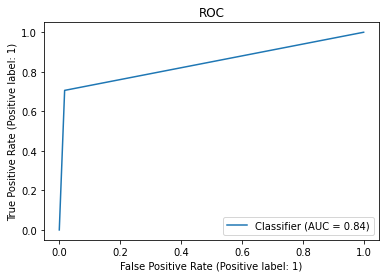

In [63]:
# confusion matrix and roc of training set for the last run
cm = confusion_matrix(y_train, pred_df['pred_label'])
print(f'Confusion Matrix of training set')
print(cm)
RocCurveDisplay.from_predictions(y_train, pred_df['pred_label']) 
plt.title('ROC')

Confusion Matrix of test set
[[72  0]
 [12 30]]


Text(0.5, 1.0, 'ROC')

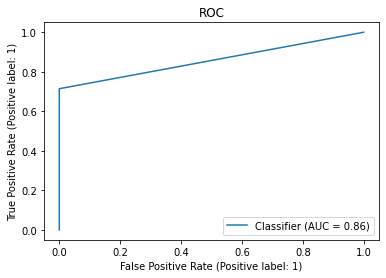

In [64]:
# confusion matrix and roc of test set for the last run
cm = confusion_matrix(y_test, pred_df_test['pred_label'])
print(f'Confusion Matrix of test set')
print(cm)
RocCurveDisplay.from_predictions(y_test, pred_df_test['pred_label']) 
plt.title('ROC')

#### (iv) Spectral Clustering

In [65]:
train_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
test_report = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

In [91]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    # Normalize data
    norm = Normalizer()
    norm.fit(X_train)
    X_train = norm.transform(X_train)
    X_test = norm.transform(X_test)
    
    # Model
    model = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf')
    model.fit(X_train)
    
    train_pred_df = pd.DataFrame(model.labels_)
    train_pred_df['true'] = y_train.reset_index(drop=True)
    
    majority_c1 = train_pred_df[train_pred_df[0]==0]['true'].mode()[0]
    majority_c2 = train_pred_df[train_pred_df[0]==1]['true'].mode()[0]
#     distances, indices = knn.kneighbors(model.cluster_centers_)
#     neighbors_c1 = y_train.iloc[indices[0]]
#     neighbors_c2 = y_train.iloc[indices[1]]
#     majority_c1 = neighbors_c1.mode()[0]
#     majority_c2 = neighbors_c2.mode()[0]
    
#     labels_pred = model.labels_
#     pred_df = pd.DataFrame(labels_pred)
    train_pred_df.loc[train_pred_df[0]==0,'pred_label'] = majority_c1
    train_pred_df.loc[train_pred_df[0]==1,'pred_label'] = majority_c2
#     pred_df[pred_df['true_label']==1].loc[:,'pred_label'] = majority_c2
    
    # train_report
    accuracy,precision,f1,recall,auc = model_report_ii(train_pred_df['true'],train_pred_df['pred_label'])
    train_report['accuracy'].append(accuracy)
    train_report['precision'].append(precision)
    train_report['f1'].append(f1)
    train_report['recall'].append(recall)
    train_report['auc'].append(auc)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,train_pred_df['pred_label'])
    
    y_pred = knn.predict(X_test)
#     pred_df_test = pd.DataFrame(y_test.reset_index(drop=True))
#     pred_df_test.loc[pred_df_test['Diagnosis']==0,'pred_label'] = majority_c1
#     pred_df_test.loc[pred_df_test['Diagnosis']==1,'pred_label'] = majority_c2
    # test_report
    accuracy,precision,f1,recall,auc = model_report_ii(y_test,y_pred)
    test_report['accuracy'].append(accuracy)
    test_report['precision'].append(precision)
    test_report['f1'].append(f1)
    test_report['recall'].append(recall)
    test_report['auc'].append(auc)

In [92]:
for stat in train_report.keys():
    print(f'The average {stat} of training set is {np.mean(train_report[stat])}')

for stat in test_report.keys():
    print(f'The average {stat} of test set is {np.mean(test_report[stat])}')

The average accuracy of training set is 0.7193995546936724
The average precision of training set is 0.7241985863423868
The average recall of training set is 0.6627066512879662
The average f1 of training set is 0.6652152508424647
The average auc of training set is 0.707961512778486
The average accuracy of test set is 0.6904093567251463
The average precision of test set is 0.6830802186546597
The average recall of test set is 0.6768253968253968
The average f1 of test set is 0.6654962998769502
The average auc of test set is 0.687579365079365


Confusion Matrix of training set
[[207  78]
 [123  47]]


Text(0.5, 1.0, 'ROC')

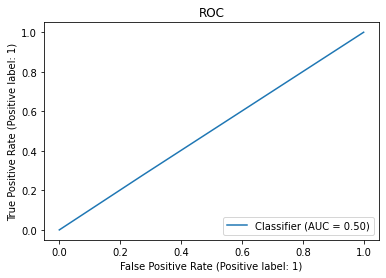

In [93]:
# confusion matrix and roc of training set for the last run
cm = confusion_matrix(y_train, pred_df['pred_label'])
print(f'Confusion Matrix of training set')
print(cm)
RocCurveDisplay.from_predictions(y_train, pred_df['pred_label']) 
plt.title('ROC')

Confusion Matrix of test set
[[38 34]
 [34  8]]


Text(0.5, 1.0, 'ROC')

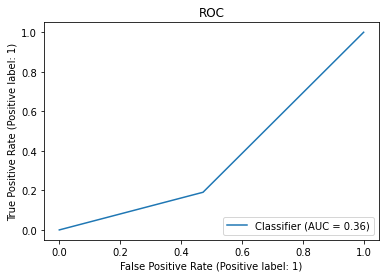

In [94]:
# confusion matrix and roc of test set for the last run
cm = confusion_matrix(y_test, pred_df_test['pred_label'])
print(f'Confusion Matrix of test set')
print(cm)
RocCurveDisplay.from_predictions(y_test, pred_df_test['pred_label']) 
plt.title('ROC')

#### (iv) Compare

It can be observed that the supervised learning approach performs better than the semi-supervised approaches, and the unsupervised approaches perform the worst.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [3]:
features = ['variance of Wavelet Transformed image', 'skewness of Wavelet Transformed image', 'curtosis of Wavelet Transformed image', 'entropy of image', 'class']
bn_df = pd.read_csv('../data/data_banknote_authentication.txt', names=features)
bn_df

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### (b) Repeat each of the following two procedures 50 times

In [4]:
def train_test_random(df):
    train = df.sample(900)
    test = df.drop(index=train.index)
#     X_train = train.drop('class', axis=1)
#     y_train = train['class']
#     X_test = test.drop('class', axis=1)
#     y_test = test['class']
    
#     return X_train, X_test, y_train, y_test
    return train, test

In [43]:
warnings.filterwarnings('ignore')

#### (i) Passive

In [82]:
param_grid ={'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]} 
passive_test_errors_df = pd.DataFrame()
for i in range(50):
#     X_train, X_test, y_train, y_test = train_test_random(bn_df)
    train, test = train_test_random(bn_df)
    X_test = test.drop('class', axis=1)
    y_test = test['class']
    
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    errors = []
    for j in range(10, 910, 10):
        sample = train.sample(10)
        train = train.drop(index = sample.index)
        X_sample = sample.drop('class', axis=1)
        y_sample = sample['class']
        X_train = pd.concat([X_train, X_sample])
        y_train = pd.concat([y_train, y_sample])
        
        model = LinearSVC(penalty='l1', dual=False, max_iter=1e7)
        gridCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
        gridCV.fit(X_train, y_train.values.ravel())
        
        y_pred = gridCV.predict(X_test)
        errors.append(1-accuracy_score(y_test, y_pred))
    passive_test_errors_df.insert(loc=i, column=i, value=errors)

In [83]:
passive_test_errors_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.135593,0.154661,0.059322,0.135593,0.201271,0.016949,0.150424,0.105932,0.044492,0.006356,...,0.177966,0.088983,0.169492,0.023305,0.156780,0.059322,0.154661,0.167373,0.135593,0.432203
1,0.099576,0.186441,0.012712,0.048729,0.042373,0.010593,0.059322,0.027542,0.125000,0.074153,...,0.050847,0.139831,0.036017,0.023305,0.059322,0.074153,0.139831,0.082627,0.042373,0.078390
2,0.019068,0.059322,0.012712,0.129237,0.088983,0.063559,0.076271,0.021186,0.076271,0.069915,...,0.040254,0.019068,0.031780,0.023305,0.059322,0.016949,0.046610,0.082627,0.012712,0.019068
3,0.012712,0.046610,0.004237,0.133475,0.029661,0.055085,0.036017,0.036017,0.008475,0.108051,...,0.021186,0.019068,0.029661,0.027542,0.055085,0.029661,0.072034,0.063559,0.012712,0.038136
4,0.012712,0.023305,0.014831,0.120763,0.036017,0.010593,0.008475,0.019068,0.008475,0.048729,...,0.021186,0.016949,0.029661,0.008475,0.042373,0.029661,0.033898,0.025424,0.012712,0.023305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.010593,0.012712,0.006356,0.010593,0.006356,0.012712,0.012712,0.012712,0.008475,0.008475,...,0.010593,0.008475,0.006356,0.002119,0.023305,0.006356,0.010593,0.004237,0.006356,0.006356
86,0.010593,0.012712,0.006356,0.010593,0.006356,0.012712,0.012712,0.012712,0.006356,0.008475,...,0.010593,0.008475,0.006356,0.002119,0.010593,0.006356,0.008475,0.004237,0.006356,0.006356
87,0.010593,0.012712,0.006356,0.008475,0.008475,0.012712,0.012712,0.012712,0.008475,0.008475,...,0.010593,0.008475,0.006356,0.002119,0.016949,0.006356,0.008475,0.004237,0.006356,0.006356
88,0.010593,0.012712,0.006356,0.010593,0.008475,0.012712,0.012712,0.008475,0.006356,0.008475,...,0.012712,0.008475,0.006356,0.002119,0.010593,0.006356,0.008475,0.004237,0.006356,0.006356


#### (ii) Active

In [84]:
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [85]:

param_grid ={'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]} 
active_test_errors_df = pd.DataFrame()
for i in range(50):
#     X_train, X_test, y_train, y_test = train_test_random(bn_df)
    train, test = train_test_random(bn_df)
    X_test = test.drop('class', axis=1)
    y_test = test['class']
    
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    errors = []
    
    # Starting with 10 random sample
    sample = train.sample(10)
    train = train.drop(index=sample.index).reset_index(drop=True)
    sample = sample.reset_index(drop=True)
    X_sample = sample.drop('class', axis=1)
    y_sample = sample['class']
    X_train = pd.concat([X_train, X_sample])
    y_train = pd.concat([y_train, y_sample])

    model = LinearSVC(penalty='l1', dual=False)
    gridCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    gridCV.fit(X_train, y_train.values.ravel())

    y_pred = gridCV.predict(X_test)
    errors.append(1-accuracy_score(y_test, y_pred))
    for j in range(10, 900, 10):
        X = train.drop('class', axis=1)
        dist = abs(gridCV.decision_function(X))
        dist = pd.DataFrame(dist)
        sample_index = dist.sort_values(0).iloc[0:10].index
        
        sample = train.loc[sample_index]
        train = train.drop(index=sample_index).reset_index(drop=True)
        
        X_sample = sample.drop('class', axis=1)
        y_sample = sample['class']
        X_train = pd.concat([X_train, X_sample])
        y_train = pd.concat([y_train, y_sample])
        
        model = LinearSVC(penalty='l1', dual=False, max_iter=1e7)
        gridCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
        gridCV.fit(X_train, y_train.values.ravel())
        
        y_pred = gridCV.predict(X_test)
        errors.append(1-accuracy_score(y_test, y_pred))
    active_test_errors_df.insert(loc=i, column=i, value=errors)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [86]:
active_test_errors_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.095339,0.027542,0.146186,0.148305,0.118644,0.029661,0.209746,0.154661,0.152542,0.220339,...,0.201271,0.381356,0.110169,0.154661,0.038136,0.021186,0.027542,0.152542,0.180085,0.161017
1,0.082627,0.008475,0.010593,0.084746,0.033898,0.177966,0.165254,0.029661,0.016949,0.133475,...,0.033898,0.103814,0.027542,0.029661,0.012712,0.067797,0.086864,0.080508,0.086864,0.027542
2,0.027542,0.260593,0.010593,0.029661,0.021186,0.076271,0.076271,0.031780,0.027542,0.122881,...,0.008475,0.108051,0.010593,0.012712,0.076271,0.023305,0.021186,0.059322,0.010593,0.025424
3,0.008475,0.082627,0.006356,0.025424,0.016949,0.021186,0.044492,0.012712,0.036017,0.099576,...,0.010593,0.031780,0.057203,0.008475,0.016949,0.063559,0.012712,0.016949,0.021186,0.010593
4,0.008475,0.040254,0.006356,0.014831,0.010593,0.012712,0.014831,0.016949,0.023305,0.074153,...,0.006356,0.033898,0.057203,0.008475,0.016949,0.012712,0.010593,0.010593,0.008475,0.004237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.014831,0.014831,0.006356,0.014831,0.012712,0.019068,0.012712,0.014831,0.012712,0.014831,...,0.012712,0.004237,0.010593,0.010593,0.016949,0.008475,0.008475,0.008475,0.008475,0.006356
86,0.014831,0.014831,0.006356,0.012712,0.012712,0.019068,0.012712,0.014831,0.012712,0.021186,...,0.012712,0.004237,0.010593,0.010593,0.016949,0.012712,0.008475,0.012712,0.008475,0.006356
87,0.016949,0.014831,0.006356,0.016949,0.012712,0.019068,0.012712,0.014831,0.012712,0.021186,...,0.012712,0.004237,0.010593,0.010593,0.012712,0.012712,0.008475,0.012712,0.008475,0.006356
88,0.016949,0.014831,0.006356,0.012712,0.012712,0.019068,0.010593,0.021186,0.012712,0.021186,...,0.008475,0.004237,0.012712,0.010593,0.012712,0.012712,0.008475,0.012712,0.008475,0.006356


### (c) Average the 50 test errors

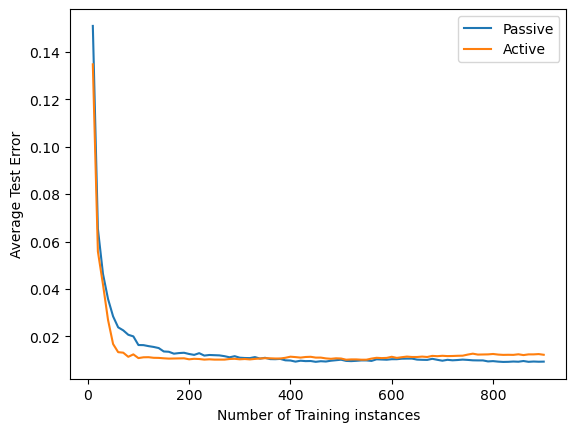

In [98]:
plt.plot(range(10,910,10),passive_test_errors_df.mean(axis=1), label='Passive')
plt.plot(range(10,910,10),active_test_errors_df.mean(axis=1), label='Active')
plt.xlabel('Number of Training instances')
plt.ylabel('Average Test Error')
plt.legend()

The average test error decreases drmatically as the number of training instances increases; however, the average test error stops decreasing after the number of training instances increased to a certain number.